In [350]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [351]:
df = pd.read_csv("train.csv")

In [352]:
df.drop("date_time",axis=1,inplace=True)


In [353]:
test = pd.read_csv("test .csv")
ind = test["date_time"]
test.drop("date_time",axis=1,inplace=True)

In [354]:
df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


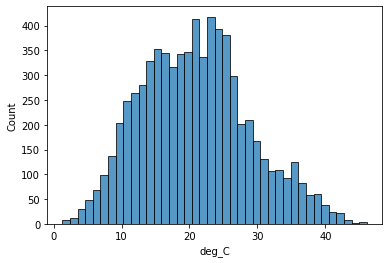

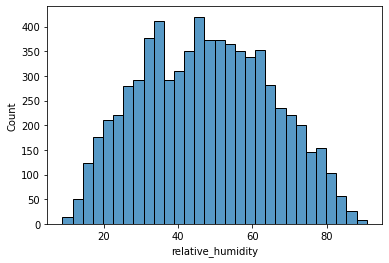

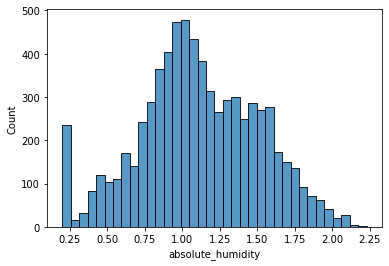

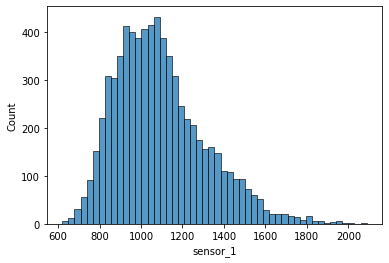

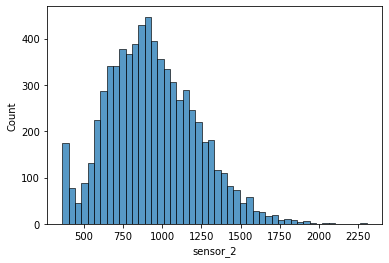

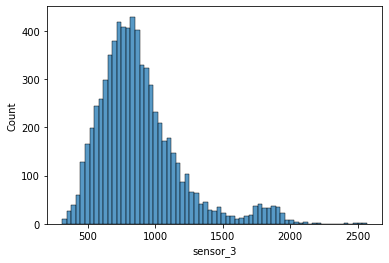

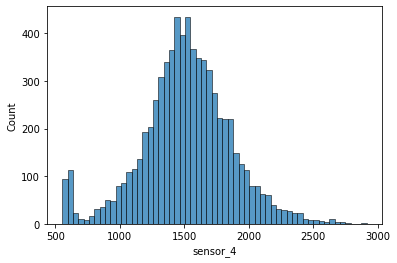

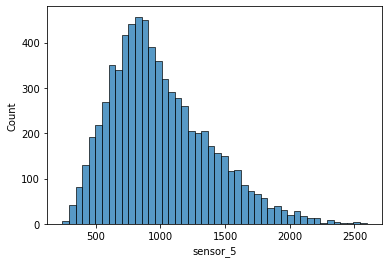

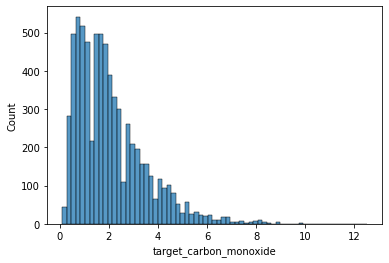

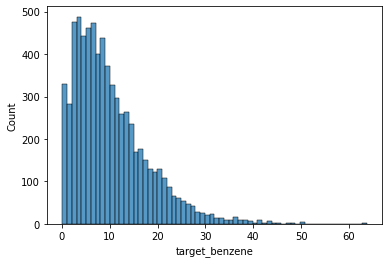

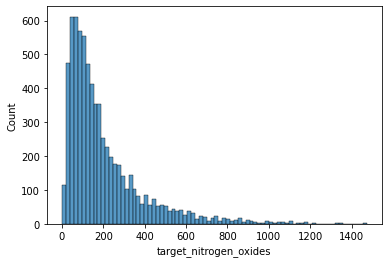

In [357]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

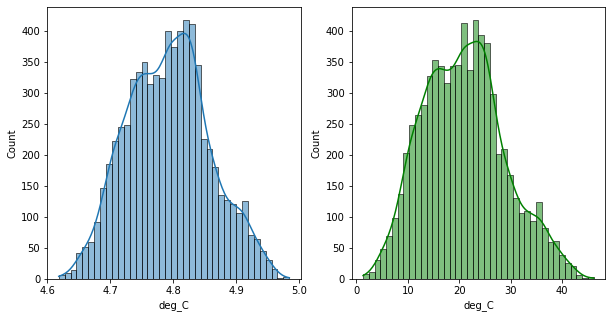

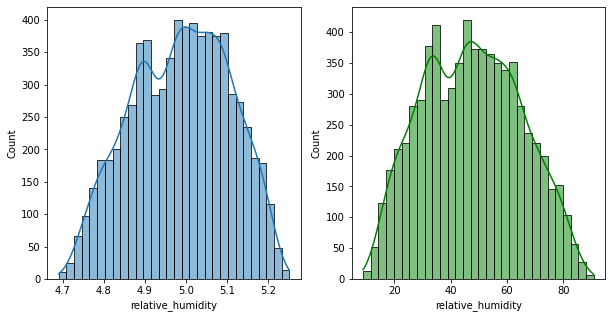

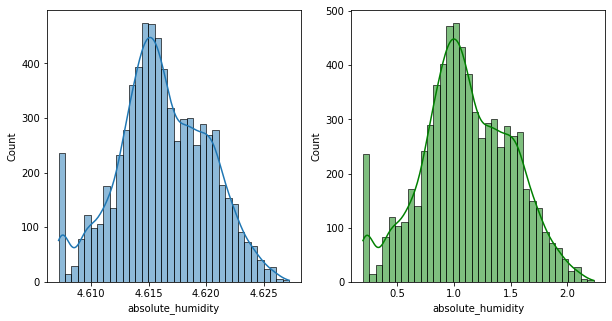

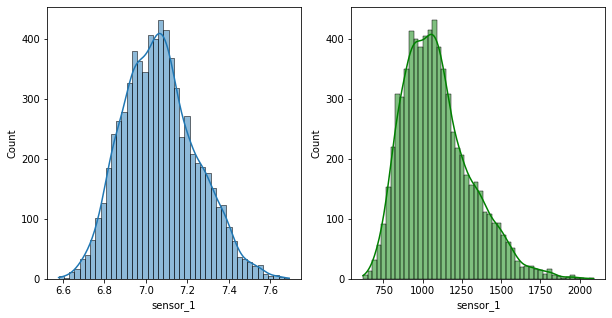

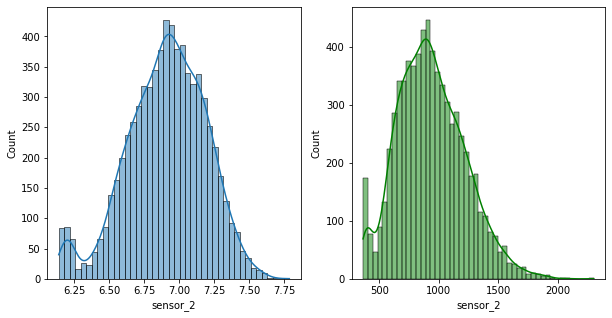

In [358]:
df1 = np.log(df.iloc[:,:-3].copy()+100)
test = np.log(test+100)
for i in df1.columns[:-3]:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(x=i,data=df1,kde=True,ax=ax[0])  
    sns.histplot(x=i,data=df,color="green",kde=True,ax=ax[1])
    # plt.legend()
    plt.show()

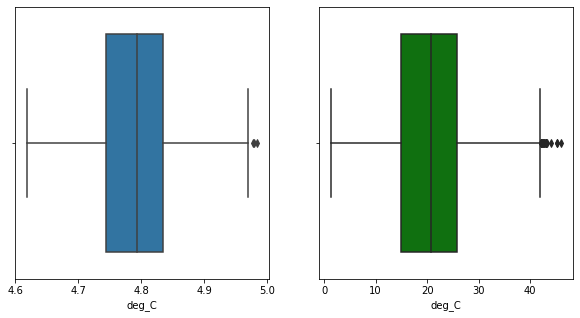

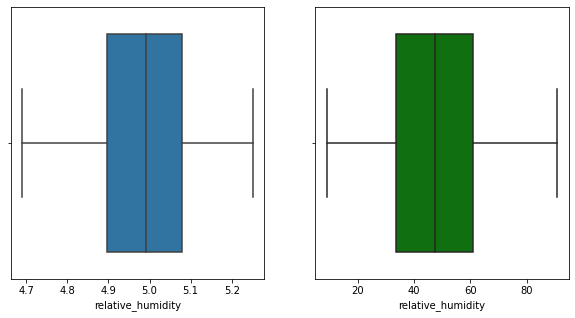

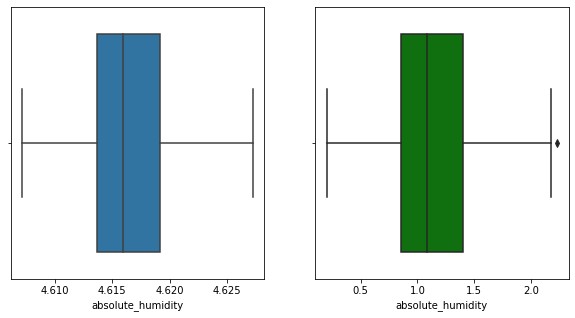

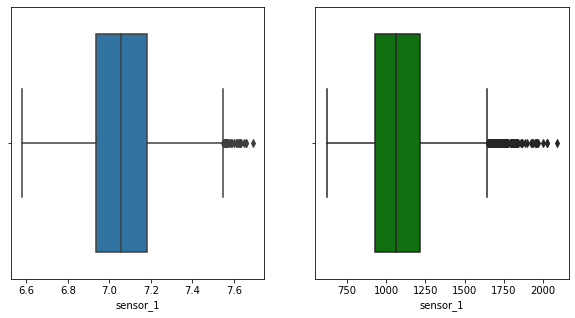

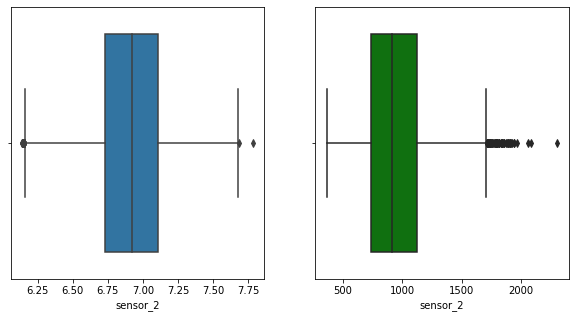

In [359]:
for i in df1.columns[:-3]:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(x=i,data=df1,ax=ax[0])  
    sns.boxplot(x=i,data=df,color="green",ax=ax[1])
    # plt.legend()
    plt.show()

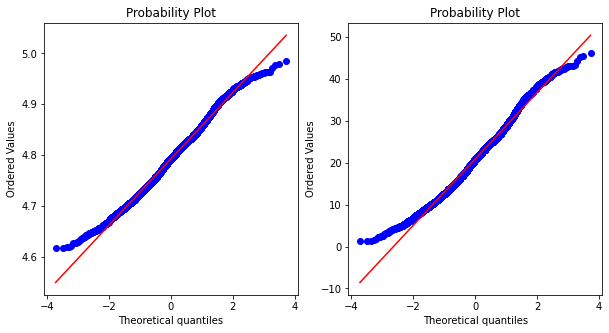

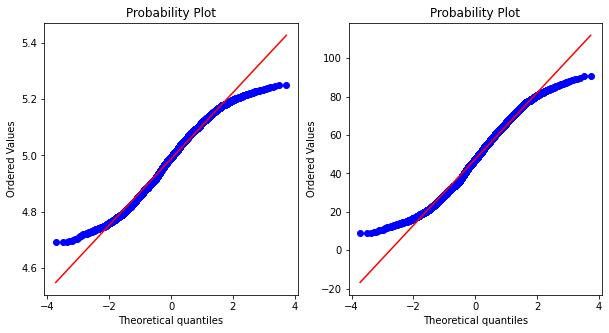

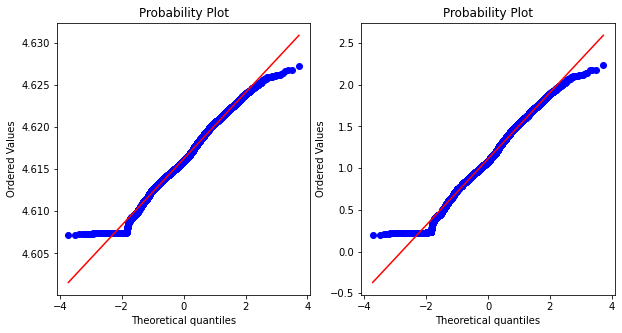

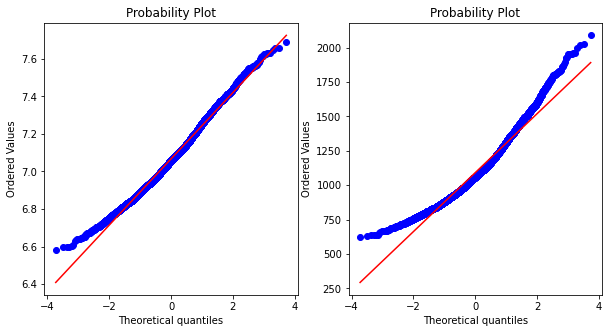

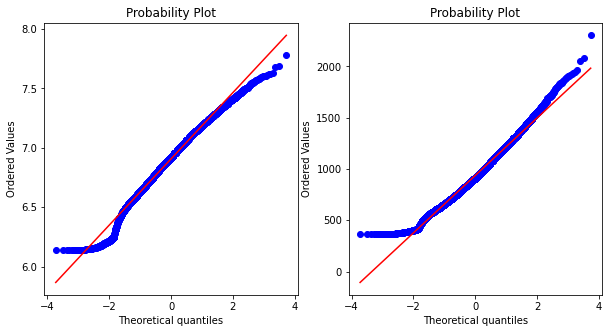

In [360]:
from scipy.stats import probplot
for i in df1.columns[:-3]:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    probplot(df1[i],dist='norm',plot=ax[0],)  
    probplot(df[i],dist='norm',plot=ax[1])
    # plt.legend()
    plt.show()

In [361]:

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_final

In [362]:
df3 = df1.copy()
df3 = df3.join(df.iloc[:,-3:])
df3 = remove_outlier_IQR(df3)
test3 = test.copy()
# test3 = remove_outlier_IQR(test3)

In [363]:
df3

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,4.728272,4.983607,4.612720,7.304650,7.079858,7.052721,7.519041,7.239502,2.5,12.0,167.7
1,4.729156,4.978801,4.612399,7.229186,6.895885,7.168195,7.345946,7.012926,2.1,9.9,98.9
2,4.723842,5.051137,4.612644,7.266758,6.936926,7.056348,7.430173,7.104144,2.2,9.2,127.1
3,4.709530,5.090062,4.613006,7.259116,6.936343,7.092491,7.400315,7.217590,2.2,9.7,177.2
4,4.717606,5.068904,4.613027,7.224025,6.859300,7.155318,7.323501,7.116556,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...
7106,4.693181,4.882802,4.609034,7.003520,6.814762,6.880384,6.916715,6.918201,1.3,5.1,191.1
7107,4.692265,4.891852,4.608929,7.023492,6.791221,6.958068,6.920573,6.911150,1.4,5.8,221.3
7108,4.696837,4.902307,4.609471,7.042636,6.765385,6.868910,6.896897,7.138152,1.6,5.2,227.4
7109,4.682131,4.946630,4.609247,6.959209,6.674435,6.916219,6.924612,7.174954,1.5,4.6,199.8


In [364]:
# model = Sequential()                # could make units 50, for better prediction
# # model.add(LayerNormalization())     # Normalizing the input data 
# # First LSTM layer
# model.add(LSTM(units=50,return_sequences=True,input_shape=(8,1),activation="relu",unroll=True))
# # model.add(Dropout(0.1))    # Removing some of the data from the previous layer to avoid overfitting
# model.add(BatchNormalization())
# model.add(LSTM(units=50, activation="relu",unroll=True,return_sequences=True))#, return_sequences=True))    # Second LSTM Layer
# # model.add(Dropout(0.1))
# model.add(Activation(activation="relu"))
# model.add(BatchNormalization())
# model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# # model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# # model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# # model.add(LSTM(units=50, return_sequences=True))
# # model.add(Dropout(0.1))
# model.add(Activation(activation="relu"))
# model.add(BatchNormalization())
# model.add(LSTM(units=50))
# # model.add(Dropout(0.1))
# model.add(BatchNormalization())
# ## 
# # model.add(Dropout(0.1))
# # model.add(LSTM(units=50,activation="relu"))
# # model.add(Dense(units=500, activation="relu"))
# # model.add(Dropout(0.2))

# model.add(Dense(units=1,activation='linear'))  # Final LSTM Layer of unit=1, cause we have just one Output, that is, Closing Price
# model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1))   # Compiling, optimizer and loss can be changed to optimize the model for our specific purpose
# model.fit(np.array(df3.iloc[:,:-3]).reshape(7111,-1,1),np.array(df3["target_carbon_monoxide"]).reshape(-1,1), epochs=10, batch_size=100)

In [365]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [366]:
test.isna().sum()

deg_C                0
relative_humidity    0
absolute_humidity    0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
dtype: int64

In [368]:
scaler = RobustScaler()
X = scaler.fit_transform(df3.iloc[:,:-3])
test3 = scaler.transform(test3)

In [321]:
scaler1 = RobustScaler().fit_transform(np.array(df3["target_carbon_monoxide"]).reshape(-1,1))

In [346]:
x_train,x_test, y_train,y_test = train_test_split(X,df3["target_carbon_monoxide"])

ValueError: Found input variables with inconsistent numbers of samples: [6680, 7111]

In [347]:
from xgboost import XGBRFRegressor
from sklearn.svm import SVR
# from catboost import XGBRF

model = CatBoostRegressor()
model.fit(x_train,y_train,verbose=False)

In [324]:
model.predict(test)

array([4.64812921, 4.64812921, 4.64812921, ..., 4.64812921, 4.64812921,
       4.64812921])

In [325]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(model.predict(x_train),y_train,squared=False))
print(mean_squared_error(model.predict(x_test),y_test,squared=False))

0.002076596756666751
0.0032396060128311887


In [295]:
# scaler1 = RobustScaler()
# Y = scaler1.fit_transform(np.array(df3["target_carbon_monoxide"]).reshape(-1,1))
# model.fit(X,Y,verbose=False)
# y_pred1 = []
# y_pred1 = scaler1.inverse_transform(model.predict(test3).reshape(-1,1))


model.fit(X,df3["target_carbon_monoxide"],verbose=False)
y_pred1 = []
y_pred1 = model.predict(test3)

In [296]:
y_pred1

array([4.62410623, 4.62410623, 4.62410623, ..., 4.62410623, 4.62410623,
       4.62410623])

In [297]:
# scaler1 = RobustScaler()
# Y = scaler1.fit_transform(np.array(df3["target_benzene"]).reshape(-1,1))
# model.fit(X,Y,verbose=False)
# y_pred2=[]
# y_pred2 =scaler1.inverse_transform(model.predict(test3).reshape(-1,1))

model.fit(X,df3["target_benzene"],verbose=False)
y_pred2 = []
y_pred2 = model.predict(test3)

In [298]:
# scaler1 = RobustScaler()
# Y = scaler1.fit_transform(np.array(df3["target_nitrogen_oxides"]).reshape(-1,1))
# model.fit(X,Y,verbose=False)
# y_pred3=[]
# y_pred3 =scaler1.inverse_transform(model.predict(test3).reshape(-1,1))

model.fit(X,df3["target_nitrogen_oxides"],verbose=False)
y_pred3 = []
y_pred3 = model.predict(test3)

In [279]:
final = pd.DataFrame({"date_time":np.array(ind).reshape(-1), "target_nitrogen_oxides":y_pred3.reshape(-1), "target_benzene":y_pred2.reshape(-1), "target_carbon_monoxide":y_pred1.reshape(-1)})

In [280]:
final.to_csv("submission.csv")

In [256]:
y_pred1

array([[4.62428309],
       [4.62428309],
       [4.62428309],
       ...,
       [4.62428309],
       [4.62428309],
       [4.62428309]])

In [ ]:
import os,io,sys,setuptools, tokenize
!pip install -q kaggle
!pip install -q kaggle-cli
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp "kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-60mmvr6f/lxml_ef60031415264101a4dd2736c19762b1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-60mmvr6f/lxml_ef60031415264101a4dd2736c19762b1/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-g50g523v/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/lxml Check the logs for full command output.
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')